In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time

def load(data_path, flag, cols):
    # load data
    print("Loading data...")
    start = time.time()
    if flag: 
        df = pd.read_csv(data_path, parse_dates = [0], date_parser = pd.to_datetime, 
        usecols = cols,
        index_col=0, skiprows=[0,2], sep='\t', nrows=50000)
        #import matplotlib.pyplot as plt
        #normalized_df=(df-df.mean())/df.std()
        #normalized_df.plot()
        #plt.show()

    else:
        df = pd.read_csv(data_path, parse_dates = [0], date_parser = pd.to_datetime, 
        usecols=cols,
        index_col=0, skiprows=[0,2], sep='\t')

    print("Starting on %s" % df.index[0])
    end = time.time()
    print("Time elasped:", end - start)
    return df

In [22]:
'''
    Plot distribution of variables for all datasets
'''
dfs=[]
variables = ['time','F1S F1SMIBV Overall', 'F1S F1SMOBV Overall', 'F1S F1SFIBV Overall', 'F1S F1SFOBV Overall']
colours = ['red', 'blue', 'green', 'orange', 'yellow', 'pink']
dfs.append(load("../data/Furnace 1 1-1-17 0056 to 0400.txt", False, variables))
dfs.append(load("../data/Furnace 1 1-7-17 0000 to 1100.txt", False, variables))
dfs.append(load("../data/Furnace 1 1-16-17 0000 to 1100.txt", False, variables))
dfs.append(load("../data/Furnace 1 2-7-17 0056 to 1300.txt", False, variables))
dfs.append(load("../data/Furnace 1 1730 to 2300.txt", False, variables))

Loading data...
Starting on 2017-01-01 00:56:32.695000
Time elasped: 430.8097286224365
Loading data...
Starting on 2017-07-01 00:56:36.130000
Time elasped: 1196.875973701477
Loading data...
Starting on 2017-01-16 00:07:47.355000
Time elasped: 1049.3277425765991
Loading data...
Starting on 2017-07-02 00:22:23.410000
Time elasped: 1350.7416899204254
Loading data...
Starting on 2017-01-14 17:07:47.395000
Time elasped: 647.6838989257812


In [23]:
for df in dfs:
    print(df.describe())

       F1S F1SFIBV Overall  F1S F1SFOBV Overall  F1S F1SMIBV Overall  \
count         2.159929e+06         2.159929e+06         2.159929e+06   
mean          1.061057e-01         6.730815e-02         1.739908e-01   
std           1.002221e-02         6.863714e-03         2.639347e-02   
min           6.708320e-02         4.224730e-02         8.244290e-02   
25%           9.914600e-02         6.228480e-02         1.559170e-01   
50%           1.058240e-01         6.680720e-02         1.732620e-01   
75%           1.130770e-01         7.214090e-02         1.907570e-01   
max           2.205630e-01         9.510690e-02         2.855980e-01   

       F1S F1SMOBV Overall  
count         2.159929e+06  
mean          2.110064e-01  
std           3.374588e-02  
min           9.170040e-02  
25%           1.858430e-01  
50%           2.126840e-01  
75%           2.369630e-01  
max           3.203100e-01  
       F1S F1SFIBV Overall  F1S F1SFOBV Overall  F1S F1SMIBV Overall  \
count         7.19

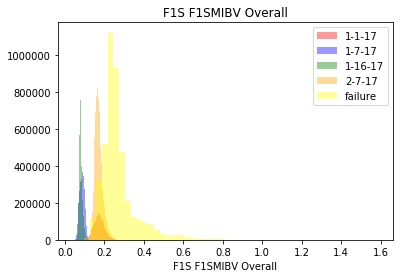

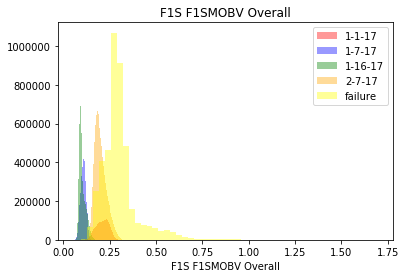

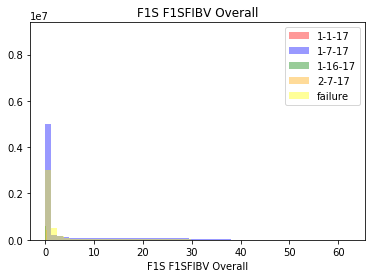

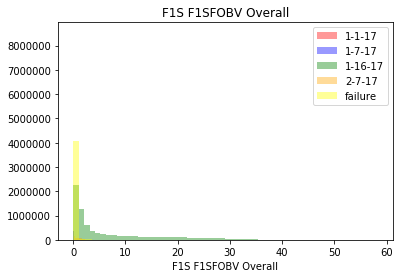

In [26]:
import matplotlib.pyplot as plt

variables = [var for var in variables if var != 'time']
dataset_labels = ['1-1-17', '1-7-17', '1-16-17', 
                    '2-7-17', 'failure']
#dfs = [scale(x) for x in dfs]


for i, col in enumerate(variables):
    for n, dataset in enumerate(dfs):
        # remove outliers:
        #z = np.abs(stats.zscore(dataset))
        #dataset = dataset.loc[:, (dataset != dataset.iloc[0]).any()] 
        #dataset = dataset[(z < 2).all(axis=1)]
        sns.distplot(dataset[col].dropna(), norm_hist = False, color = colours[n], kde=False, label=dataset_labels[n])
    plt.legend()
    plt.title(col)
    plt.savefig('../figs/' + col.replace(" ", "-") + '-dist.png')
    plt.show()


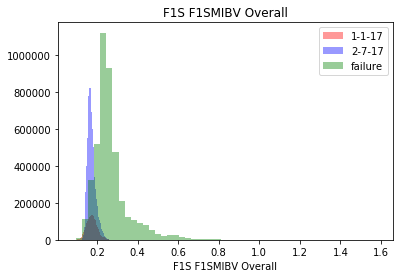

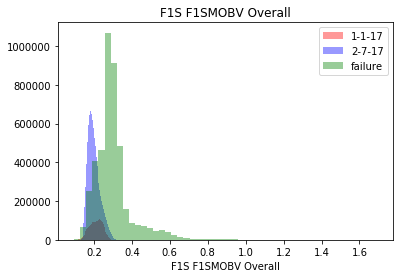

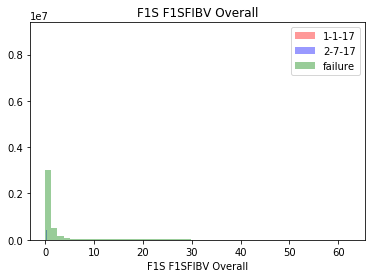

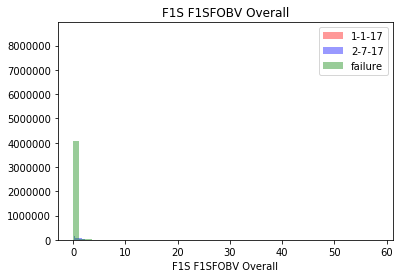

In [28]:
import matplotlib.pyplot as plt

dfs_ = []
dfs_.append(dfs[0])
dfs_.append(dfs[3])
dfs_.append(dfs[4])

variables = [var for var in variables if var != 'time']
dataset_labels = ['1-1-17', '2-7-17', 'failure']
#dfs = [scale(x) for x in dfs]


for i, col in enumerate(variables):
    for n, dataset in enumerate(dfs_):
        # remove outliers:
        #z = np.abs(stats.zscore(dataset))
        #dataset = dataset.loc[:, (dataset != dataset.iloc[0]).any()] 
        #dataset = dataset[(z < 2).all(axis=1)]
        sns.distplot(dataset[col].dropna(), norm_hist = False, color = colours[n], kde=False, label=dataset_labels[n])
    plt.legend()
    plt.title(col)
    plt.savefig('../figs/' + col.replace(" ", "-") + '-dist-wo-anom.png')
    plt.show()

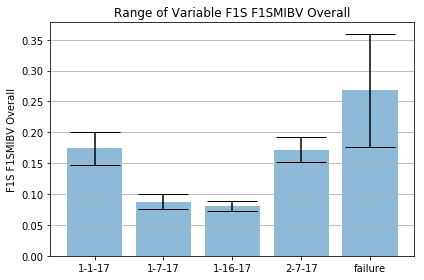

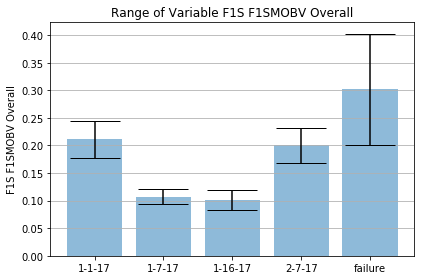

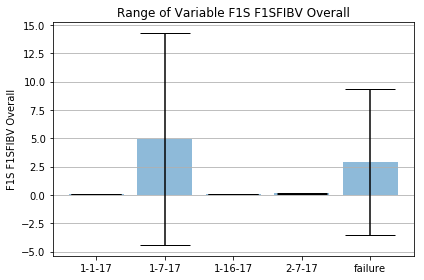

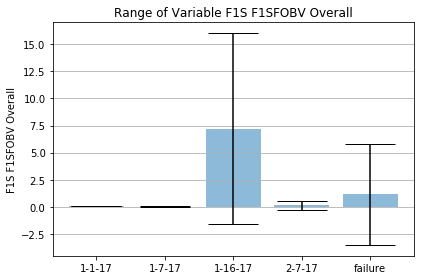

In [27]:
for i, col in enumerate(variables):
    mean = [np.mean(d[col].dropna().values) for d in dfs]
    error = [np.std(d[col].dropna().values) for d in dfs]
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(mean)), mean, yerr=error, align='center', alpha=0.5, 
                                ecolor='black', capsize=25)
    ax.set_ylabel(col)
    ax.set_xticks(np.arange(len(mean)))
    ax.set_xticklabels(dataset_labels)
    ax.set_title('Range of Variable ' + col)
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    plt.savefig('../figs/' + col.replace(" ", "-") + '-bar.png')
    plt.show()